# Experiment and path specification

In [1]:
# Specify the experiment for analysis
experiment='xppl2816'
runNumber = 74

# Set the installation and output path
import os
os.environ['INSTALLPATH']='/reg/neh/home4/mrware/TRXS'
os.environ['OUTPUTPATH']= '/reg/d/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

# Import Libraries

In [2]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *
# Determine current user
currentUser, error = unixCMD("echo $USER")
print(currentUser)
os.environ['RESULTSPATH']= ('/reg/d/psdm/%s/%s/res/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

Current user is mrware will output batch to /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch
mrware



# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [3]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsTools')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

/reg/d/psdm/xpp/xppl2816/scratch/Memories/getCSPADcoords remembered!
Current user is mrware will output batch to /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch


## Load point data

In [4]:
pointData = load_obj( os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber )

/reg/d/psdm/xpp/xppl2816/res/mrware/pointData-run-74 remembered!


## Plot histogram of result

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.3.9/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


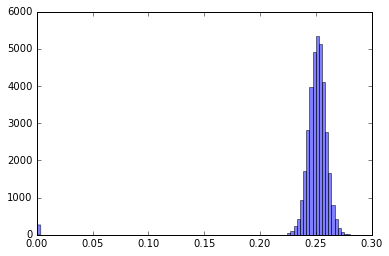

In [5]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['ebeamcharge'], bins=100,normed=False, alpha=0.5);

# Read in CSPAD via batch job

## Specify good idxs

In [7]:
goodIdx = runFilter( pointData , filterOn=['opaint' , 'xint3','xpos3','ypos3', 'xint2','xpos2','ypos2', 'xrayEnergy','ebeamcharge','fltposfwhm','cspadSum','cspadMedian'], maddevs=3 ).astype(bool)


## Now generate time delays

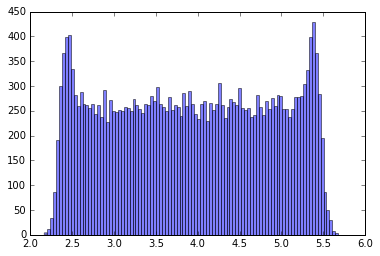

In [8]:
TTPoly = np.array([2.235e-7, -2.21e-3, 8.547e-1]) 

TTFltPos = pointData['ttfltpos']
TTCorrFltPos = TTPoly[0]*TTFltPos**2+TTPoly[1]*TTFltPos+TTPoly[2]

TTTime = TTCorrFltPos + pointData['stageencoder']

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(TTTime[goodIdx], bins=100,normed=False, alpha=0.5);

# Read in timebinned CSPAD

In [9]:
# timebins = np.arange( -1.5,1.5,.03 )
timebins = np.arange( 2.,5.5,.03 ) # Run 74
# timebins = np.arange( 2.5,5.,.5 ) # Run 74 - testing
dt = timebins[1]-timebins[0]
NT = timebins.size

tagList = []
for idx, t in enumerate(timebins):
    tIndex = (TTTime >= t-dt/2.)&(TTTime < t+dt/2.)
    allIndex = tIndex & goodIdx
    filteredSeconds = pointData['seconds'][allIndex]
    filteredNanoseconds = pointData['nanoseconds'][allIndex]
    filteredFiducials = pointData['fiducials'][allIndex]
    tagList.append( {'seconds':filteredSeconds, 'nanoseconds':filteredNanoseconds, 'fiducials':filteredFiducials} )

# batchThreads = batchCSPADGrabber (tagList, experiment=experiment, runNumber=runNumber)
batchThreads = batchCSPADMVGrabber (tagList, experiment=experiment, runNumber=runNumber)

batchThreads.Queue = 'psanaq'   
batchThreads.start()


Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=7000]" -q psanaq -o /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/CSPADMV-run-74-temp-CSPAD-0.out /reg/neh/home4/mrware/TRXS/Libraries/pythonBatchMagic/BatchWrapper.sh mpirun python2 /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Python/CSPADMV-run-74-temp-CSPAD-0.py'
Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=7000]" -q psanaq -o /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/CSPADMV-run-74-temp-CSPAD-1.out /reg/neh/home4/mrware/TRXS/Libraries/pythonBatchMagic/BatchWrapper.sh mpirun python2 /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Python/CSPADMV-run-74-temp-CSPAD-1.py'
Output: Job <401728> is submitted to queue <psanaq>.

Error: 
Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=7000]" -q psanaq -o /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/CSPADMV-r

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.3.9/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/reg/neh/home4/mrware/TRXS/Libraries/pythonBatchMagic/lclsBatch.py", line 553, in run
    self.gather()
  File "/reg/neh/home4/mrware/TRXS/Libraries/pythonBatchMagic/lclsBatch.py", line 579, in gather
    CSPADdict = load_obj( BATCHDIR + '/Output/mean-var-node-%d-run-%d' % (node,self.runNumber) )
  File "/reg/neh/home4/mrware/TRXS/Libraries/LCLS/dataAnalysis.py", line 57, in load_obj
    raise e
IOError: [Errno 2] No such file or directory: '/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-16-run-74.pkl'



In [8]:
batchThreads.status
stdoutdata, stderrdata = bjobs()
print stdoutdata
print stderrdata

JOBID   USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
337963  mrware  RUN   psanaq     psanagpu105 psana1414   *SPAD-0.py Nov 13 13:23
337965  mrware  RUN   psanaq     psanagpu105 psana1314   *SPAD-1.py Nov 13 13:23
337971  mrware  RUN   psanaq     psanagpu105 psana1101   *SPAD-2.py Nov 13 13:23
337974  mrware  RUN   psanaq     psanagpu105 psana1108   *SPAD-3.py Nov 13 13:23
337978  mrware  RUN   psanaq     psanagpu105 psana1417   *SPAD-4.py Nov 13 13:23


/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-0-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-1-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-2-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-3-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-4-run-74 remembered!


In [ ]:
# batchThreads.requestStop()
# bkill(killAll=True)

# Save resulting CSPAD

In [13]:
batchThreads.gather()
CSPAD = batchThreads.CSPAD
variance = batchThreads.variance
counts = batchThreads.counts

/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-0-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-1-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-2-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-3-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-4-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-5-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-6-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-7-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-8-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-9-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/mean-var-node-10-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratc

In [14]:

np.save(os.environ['RESULTSPATH']+'/timebins-run-%d' % runNumber ,timebins)
np.save(os.environ['RESULTSPATH']+'/CSPAD-run-%d' % runNumber  , CSPAD)
np.save(os.environ['RESULTSPATH']+'/variance-run-%d' %  runNumber , variance)
np.save(os.environ['RESULTSPATH']+'/counts-run-%d' % runNumber  , counts)


# Plot CSPAD

1.1603086406e-07


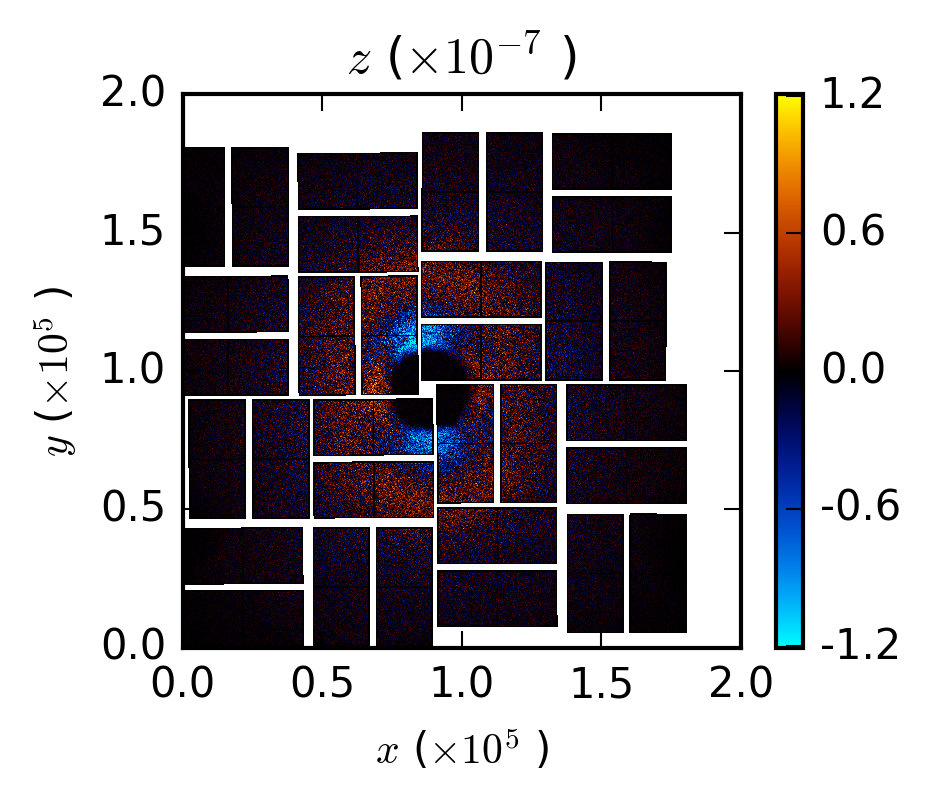

In [17]:
from IPython.display import clear_output
from plotStyles import *

def plotCSPAD( cspad , x , y, cspadMask=None, zLims = None, divergent=False ):
    figOpts = {'xLims':[0,2e5],'yLims':[0,2e5],'divergent':divergent, 'xIn':3, 'yIn':3*11.5/14.5}
    
    if zLims is not None:
        figOpts['zLims'] = zLims
    
    for iTile in range(32):
    
        if cspadMask is not None:
            cspadTile = cspad[iTile,:,:]
            tileMask = ~cspadMask[iTile,:,:]
            cspadTile[tileMask] = 0
        
        if iTile == 0:
            newFigure = True
        else:
            newFigure = False
            
        clear_output()
        colorPlot( x[iTile,:,:], y[iTile,:,:], cspadTile , newFigure=newFigure, **figOpts);


x,y = CSPADgeometry()
cspadMask = createMask().astype(bool)
print(cspadMask.shape)


CSPADbinned = CSPAD
        
# plotCSPAD( cspadMask, x , y , cspadMask=cspadMask, divergent=True )
plotCSPAD( CSPADbinned[:,:,:,40]-CSPADbinned[:,:,:,20], x , y , cspadMask=cspadMask, divergent=True )

